<a href="https://colab.research.google.com/github/arjnmj/ML-Fraud-Detection/blob/main/MODEL_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression

In [7]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn import svm
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/creditcard.csv')
df = pd.DataFrame(data)

## Data Visualization

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


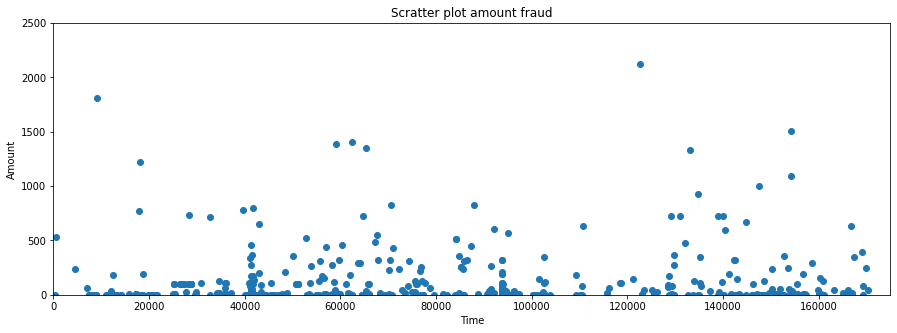

In [ ]:
df_fraud = df[df['Class'] == 1]
plt.figure(figsize=(15,5))
plt.scatter(df_fraud['Time'], df_fraud['Amount'])
plt.title('Scratter plot amount fraud')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.xlim([0,175000])
plt.ylim([0,2500])
plt.show()

In [ ]:
nb_big_fraud = df_fraud[df_fraud['Amount'] > 1000].shape[0] # Recovery of frauds over 1000
print('There are only {} frauds where the amount was bigger than 1000 over {} frauds'.format(str(nb_big_fraud),str(df_fraud.shape[0]) ))

There are only 9 frauds where the amount was bigger than 1000 over 492 frauds


## Unbalanced Data

In [ ]:
number_fraud = len(data[data.Class == 1])
number_no_fraud = len(data[data.Class == 0])
print('There are only {}  frauds in the original dataset, even though there are {} no frauds in the dataset.'.format(str(number_fraud),str(number_no_fraud)))

There are only 492  frauds in the original dataset, even though there are 284315 no frauds in the dataset.


## Correlation of the features

In [ ]:
df_corr = df.corr() # Pearson, Standard Correlation Coefficient

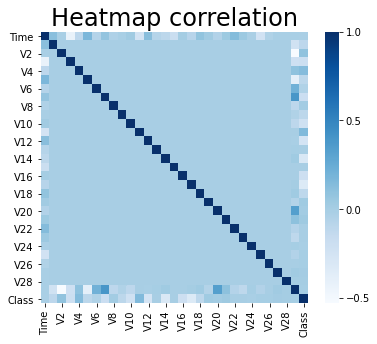

In [ ]:
plt.figure(figsize=(6,5))
sns.heatmap(df_corr, cmap='Blues')
sns.set(font_scale=2,style='white')

plt.title('Heatmap correlation')
plt.show()

## Data Selection

In [8]:
df = df.drop(columns = ['Time'], axis = 1)
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [14]:
X = df.drop(columns=['Class'], axis=1)
y = df.Class
y

,Class
0,0
1,0
2,0
3,0
4,0
...,...
284802,0
284803,0
284804,0
284805,0


Split data into **training set** and **testing set**. Split them into a 70/30 proportion, where 70% of data will be used for **training** while the 30% left will be used for **testing**.

In [17]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y,test_y = train_test_split(X, y, test_size= .3, random_state = 123)

In [18]:
print('X Train size: ', train_x.shape)
print('X Test size: ', test_x.shape)
print('X Test proportion ', "%s%%"%round((len(test_x) / (len(train_x) + len(test_x))) * 100))

X Train size:  (199364, 29)
X Test size:  (85443, 29)
X Test proportion  30%


In [19]:
print('Y Train size: ', train_y.shape)
print('Y Test size: ', test_y.shape)
print('Y Test proportion ', "%s%%"%round((len(test_y) / (len(train_y) + len(test_y))) * 100))

Y Train size:  (199364,)
Y Test size:  (85443,)
Y Test proportion  30%


Normalizing 'Amount' feature with StandardScaler, separately on each set, in order to avoid **data leakage**.

In [21]:
# Scaling data on the training set
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_x['Amount'] = scaler.fit_transform(train_x.Amount.values.reshape(-1,1))
train_x

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
9057,1.223528,0.726064,-0.192303,1.315143,0.327134,-0.627426,0.103793,-0.166424,0.941614,-0.755328,...,-0.117242,-0.168107,-0.192579,-0.161883,-0.158105,0.687808,-0.363874,0.001551,0.030803,-0.350266
197407,-1.531257,-0.845410,-0.661207,-0.010479,2.096034,-1.582374,0.644661,-0.146939,0.305072,-0.877905,...,-0.256196,-0.425386,-0.558420,1.625851,0.490823,0.165614,-0.613079,0.388003,-0.082430,-0.314286
257714,2.302551,-1.410263,-1.301974,-1.825564,-0.774062,0.000869,-1.163464,-0.018924,-1.428129,1.749254,...,-0.390696,-0.164472,-0.037426,0.172886,0.066635,-0.104352,-0.174764,-0.003206,-0.060548,-0.274222
201302,1.809691,0.232969,0.312680,3.745688,-0.357230,0.337521,-0.547228,0.286964,-0.538232,1.574565,...,-0.340672,-0.152481,-0.534599,0.448150,-0.047445,-0.652783,-0.402664,-0.002607,-0.035744,-0.314286
167965,-2.449361,2.602426,-2.648017,0.169754,-0.043874,-1.789616,-0.259222,1.078845,-0.559213,-1.896160,...,-0.729064,0.476948,0.868659,0.003451,-0.202979,-0.444781,-0.232060,-1.115661,-0.025988,-0.350266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192476,2.085321,-1.119472,-0.260414,-0.829419,-1.373550,-0.504944,-1.224794,0.027016,0.011921,0.910736,...,-0.011516,0.523933,1.560949,0.059730,0.131521,-0.145999,0.012917,0.012268,-0.054809,-0.264256
17730,-1.039001,0.950070,0.389899,-1.217401,1.855856,3.640886,-0.549604,1.505694,-0.559184,-0.619047,...,0.177503,-0.090529,-0.491079,-0.179921,1.004741,0.317712,0.281484,0.153761,0.062423,-0.330295
28030,1.129333,0.471653,0.657500,2.454111,-0.091741,-0.089917,0.008581,0.060009,-0.623285,0.661338,...,-0.212507,-0.048241,-0.201293,0.053427,0.027638,0.321256,-0.042526,0.001532,0.021002,-0.306281
277869,1.636784,-0.560857,-1.944589,0.405452,0.157569,-0.635650,0.315338,-0.200477,0.678971,-0.775364,...,0.276758,-0.100809,-0.465458,-0.063594,-0.580315,-0.080220,-0.101500,-0.043508,-0.001004,0.462086


In [22]:
# Scaling data on the testing set
scaler = StandardScaler()
test_x['Amount'] = scaler.fit_transform(test_x.Amount.values.reshape(-1,1))
test_x

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
73129,-0.623235,1.097949,0.748810,0.763394,-0.179458,-0.258895,0.430106,0.466788,-0.935937,-0.283034,...,-0.066304,0.243136,0.468435,-0.055127,-0.012280,-0.236499,-0.327825,0.023302,0.089418,-0.151402
229597,2.155748,-0.998223,-1.158978,-0.992298,-0.484600,-0.308857,-0.677077,-0.193517,-0.083026,0.705357,...,0.124636,0.174775,0.519005,0.003460,-1.017962,-0.009465,-0.118435,-0.006350,-0.053375,-0.119496
220218,1.614893,-0.194953,-2.050402,1.469645,0.540352,-0.665439,0.677713,-0.246032,-0.079937,-0.181429,...,0.173336,-0.029061,-0.369654,-0.071308,-0.520915,0.091351,-0.749140,-0.023202,-0.003519,0.438859
198374,1.908756,-2.517443,0.277391,-1.466555,-1.521858,3.005920,-2.800770,0.981435,0.349534,1.171678,...,-0.350968,0.050867,0.984547,0.163995,-0.905736,-0.511626,0.097492,0.147579,-0.036551,-0.023778
167980,2.120853,-1.048240,-1.895990,-1.236063,-0.038722,-0.274832,-0.388942,-0.196979,-0.649028,1.014140,...,0.176958,0.455959,1.125977,-0.263681,-1.322770,0.308495,0.132642,-0.057106,-0.074845,0.023084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64823,0.981634,-0.013797,0.702670,1.179459,0.141590,1.295216,-0.350124,0.487122,0.426048,-0.362567,...,-0.289286,-0.111793,0.008747,0.192576,-0.639571,0.165878,-0.418655,0.110630,0.016445,-0.312328
144933,-0.188338,0.753188,0.535544,-0.242559,0.103888,-0.044430,0.423675,0.077219,0.369646,-0.980602,...,-0.078595,0.339947,1.167204,-0.185061,-0.401266,-0.765919,-0.238929,0.166404,0.236026,-0.176369
31407,-0.959696,0.736918,1.722280,0.265029,0.769584,-0.443858,0.885135,-0.035855,-0.407058,-0.869518,...,0.003919,-0.074657,-0.200209,-0.376018,-0.108290,0.847200,-0.397175,0.026365,0.062753,-0.259524
28343,1.293597,-0.527259,0.659631,-0.775476,-0.962009,-0.355633,-0.699761,0.061105,-1.084533,0.719309,...,0.071060,0.002715,-0.111126,0.167429,0.206325,0.109294,-0.481575,0.024369,0.012776,-0.290991


SMOTE

In [23]:
y.value_counts() # 0 = Genuine Transactions | 1 = Fraud

,count
Class,
0,284315
1,492


In [24]:
from imblearn.over_sampling import SMOTE
train_x, train_y = SMOTE().fit_resample(train_x,train_y)

In [25]:
train_y.value_counts()

,count
Class,
0,199032
1,199032


# Applying Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
classifier = LogisticRegression()

In [28]:
classifier.fit(train_x,train_y)

LogisticRegression()

In [29]:
y_predictions_rf = classifier.predict(test_x)

### Scores of Logistic Regression

In [30]:
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score, f1_score
# Printing Evaluation Metrics for Random Forest
metrics = [['Accuracy',(accuracy_score(test_y, y_predictions_rf))],
                         ['Precision',precision_score(test_y, y_predictions_rf)],
                         ['Recall', recall_score(test_y, y_predictions_rf)],
                         ['F1_score',f1_score(test_y, y_predictions_rf)]]
metrics_df = pd.DataFrame(metrics, columns = ['Metrics', 'Results'])
metrics_df

,Metrics,Results
0,Accuracy,0.973304
1,Precision,0.060870
2,Recall,0.918750
3,F1_score,0.114175


### Confusion Matrix

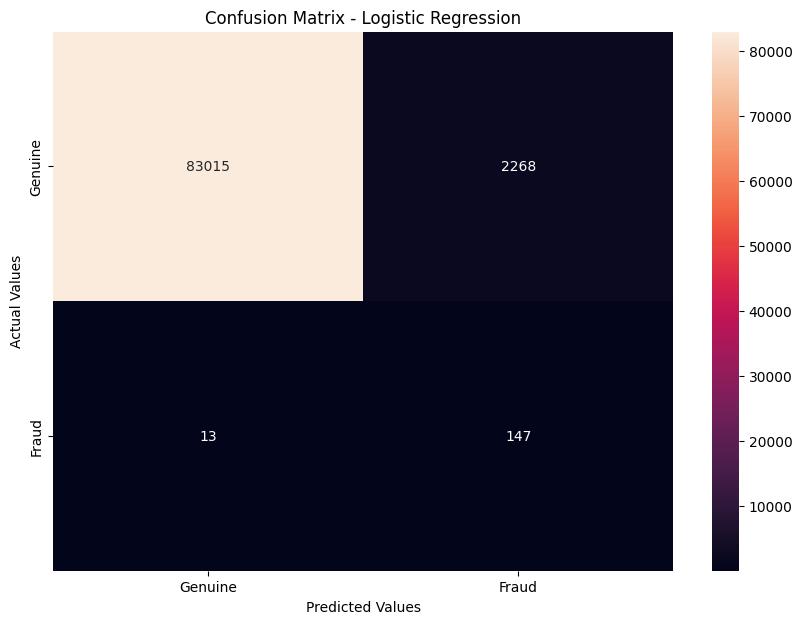

In [32]:
# Confusion Matrix for Random Forest
confusion_matrix_rf = confusion_matrix(test_y, y_predictions_rf)
# Visualization
plt.figure(figsize=(10,7))
ax = plt.subplot()
sns.heatmap(confusion_matrix_rf, annot=True, fmt='g', ax = ax)
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')
ax.set_title('Confusion Matrix - Logistic Regression')
ax.xaxis.set_ticklabels(['Genuine','Fraud'])
ax.yaxis.set_ticklabels(['Genuine','Fraud'])
plt.show()